In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url = 'https://raw.githubusercontent.com/fdd-eiu/afew/main/afewdata.csv'
df = pd.read_csv(url, index_col=0)
df

,yr,gr_id,flag_id,fleet_id,ez_id,days,skj_c,yft_c,bet_c,days_arch,skj_arch_c,yft_arch_c,bet_arch_c,alb_c,bum_c,blm_c,mls_c,swo_c
id,,,,,,,,,,,,,,,,,,
6599,2010,G,JP,NaN,I6,0.0,315.0,22.0,2.0,0.0,0.0000,0.00000,0.00000,24.0,94.0,0.0,899.0,483.0
6600,2010,G,VN,NaN,VN,0.0,11866.0,942.0,646.0,0.0,0.0000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0
6601,2010,H,ID,NaN,ID,0.0,0.0,10692.0,218.0,0.0,0.0000,2191.32099,44.67901,0.0,80.0,7.0,0.0,4.0
6602,2010,H,PH,NaN,PH,0.0,131.0,11314.0,284.0,0.0,6.2094,536.28360,13.46160,102.0,396.0,113.0,0.0,16.0
6603,2010,H,US,HW,HW,0.0,7.0,265.0,340.0,0.0,0.0000,0.00000,0.00000,53.0,2.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2021,T,US,GU,GU,0.0,302.0,42.0,0.0,0.0,0.0000,0.00000,0.00000,0.0,14.0,0.0,0.0,0.0
11996,2021,T,US,HW,HW,0.0,68.0,330.0,12.0,0.0,0.0000,0.00000,0.00000,1.0,112.0,1.0,8.0,0.0
11997,2021,T,US,MP,MP,0.0,136.0,12.0,0.0,0.0,0.0000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Define the range of years to filter
#start_year = 1997
#end_year = 2021

In [ ]:
# Filter data by multiple years starting from 1997 to 2021
#filtered_data = df[(df['yr'] >= start_year) & (df['yr'] <= end_year)]
#filtered_data

In [ ]:
#Select key 4 tuna species and other variables in the dataframe
columns_to_select_eez = ['yr', 'ez_id', 'skj_c', 'yft_c', 'bet_c', 'alb_c']

In [ ]:
df1 = df[columns_to_select_eez]#select all catch by EEZ only
df1

,yr,ez_id,skj_c,yft_c,bet_c,alb_c
id,,,,,,
6599,2010,I6,315.0,22.0,2.0,24.0
6600,2010,VN,11866.0,942.0,646.0,0.0
6601,2010,ID,0.0,10692.0,218.0,0.0
6602,2010,PH,131.0,11314.0,284.0,102.0
6603,2010,HW,7.0,265.0,340.0,53.0
...,...,...,...,...,...,...
11995,2021,GU,302.0,42.0,0.0,0.0
11996,2021,HW,68.0,330.0,12.0,1.0
11997,2021,MP,136.0,12.0,0.0,0.0


In [ ]:
SB_eez = df1.loc[df['ez_id'] == 'SB']# Select catch data in SB EEZ only
print(SB_eez)
#KI_eez = df1[df1['ez_id'].isin(['KI', 'GL', 'LN', 'PX'])]# To select catch data in KI EEZ with multiple EEZ
#print(KI_eez)

         yr ez_id         skj_c         yft_c       bet_c        alb_c
id                                                                    
6610   2010    SB      0.000000      0.000000    0.000000     0.000000
6635   2010    SB      0.999000      9.180000    1.475000    68.963000
6648   2010    SB      1.679138     16.104845    3.199208    92.044355
6679   2010    SB      0.000000   4998.184975  659.970031  1471.396988
6692   2010    SB      0.000000    302.161000   80.439000    33.531000
...     ...   ...           ...           ...         ...          ...
11908  2021    SB    296.477000     48.248000    0.898000     0.000000
11919  2021    SB  14913.747000  11990.698000  185.403000     0.000000
11939  2021    SB   1559.306000    251.728000   24.309000     0.000000
11952  2021    SB  12126.703000   3348.798000  646.441000     0.000000
11982  2021    SB   3195.512000   1704.790000  121.806000     0.000000

[256 rows x 6 columns]


In [ ]:
# Select catch data in SB EEZ only and aggregate years
SB_eez1 = SB_eez.groupby(['yr', 'ez_id']).sum().reset_index()
print(SB_eez1)

      yr ez_id          skj_c         yft_c        bet_c         alb_c
0   2010    SB  128774.618662  38016.041924  8178.351136   6036.833692
1   2011    SB  121887.618295  41823.955547  7754.054322   6432.056661
2   2012    SB   57239.547048  28637.466637  3858.808931   8182.319023
3   2013    SB   80007.300509  37812.510288  4838.715656   9082.301380
4   2014    SB   36056.408629  34727.135225  4562.445830  13130.780271
5   2015    SB   72811.028714  40766.974878  5901.493713   6893.898332
6   2016    SB   92870.354388  63812.239451  5446.991492   3769.430609
7   2017    SB  116250.890081  45631.376635  5558.431495   5584.219240
8   2018    SB   49106.624801  28921.079332  4123.982222   7027.602290
9   2019    SB   40778.818097  22993.263790  2763.038949   4505.406257
10  2020    SB   78538.902955  26543.644341  2325.872243   2511.821787
11  2021    SB   79912.618006  33798.863103  3587.290560   2912.811872


In [ ]:
#Drop column ez_id 
columns_to_drop = ['ez_id']
SB_eez2 = SB_eez1.drop(columns=columns_to_drop)
# Print the updated DataFrame
print(SB_eez2)

      yr          skj_c         yft_c        bet_c         alb_c
0   2010  128774.618662  38016.041924  8178.351136   6036.833692
1   2011  121887.618295  41823.955547  7754.054322   6432.056661
2   2012   57239.547048  28637.466637  3858.808931   8182.319023
3   2013   80007.300509  37812.510288  4838.715656   9082.301380
4   2014   36056.408629  34727.135225  4562.445830  13130.780271
5   2015   72811.028714  40766.974878  5901.493713   6893.898332
6   2016   92870.354388  63812.239451  5446.991492   3769.430609
7   2017  116250.890081  45631.376635  5558.431495   5584.219240
8   2018   49106.624801  28921.079332  4123.982222   7027.602290
9   2019   40778.818097  22993.263790  2763.038949   4505.406257
10  2020   78538.902955  26543.644341  2325.872243   2511.821787
11  2021   79912.618006  33798.863103  3587.290560   2912.811872


In [ ]:
#plot a stacked bar graph
SB_bar = pd.DataFrame(SB_eez2)
years = SB_bar['yr']
SB_bar = SB_bar.set_index('yr')
SB_bar

,skj_c,yft_c,bet_c,alb_c
yr,,,,
2010,128774.618662,38016.041924,8178.351136,6036.833692
2011,121887.618295,41823.955547,7754.054322,6432.056661
2012,57239.547048,28637.466637,3858.808931,8182.319023
2013,80007.300509,37812.510288,4838.715656,9082.301380
2014,36056.408629,34727.135225,4562.445830,13130.780271
2015,72811.028714,40766.974878,5901.493713,6893.898332
2016,92870.354388,63812.239451,5446.991492,3769.430609
2017,116250.890081,45631.376635,5558.431495,5584.219240
2018,49106.624801,28921.079332,4123.982222,7027.602290


In [ ]:
# Convert DataFrame to numeric
numeric_df = SB_bar.apply(pd.to_numeric)
SB = pd.DataFrame(numeric_df)
# Print the numeric DataFrame
print(SB)

              skj_c         yft_c        bet_c         alb_c
yr                                                          
2010  128774.618662  38016.041924  8178.351136   6036.833692
2011  121887.618295  41823.955547  7754.054322   6432.056661
2012   57239.547048  28637.466637  3858.808931   8182.319023
2013   80007.300509  37812.510288  4838.715656   9082.301380
2014   36056.408629  34727.135225  4562.445830  13130.780271
2015   72811.028714  40766.974878  5901.493713   6893.898332
2016   92870.354388  63812.239451  5446.991492   3769.430609
2017  116250.890081  45631.376635  5558.431495   5584.219240
2018   49106.624801  28921.079332  4123.982222   7027.602290
2019   40778.818097  22993.263790  2763.038949   4505.406257
2020   78538.902955  26543.644341  2325.872243   2511.821787
2021   79912.618006  33798.863103  3587.290560   2912.811872


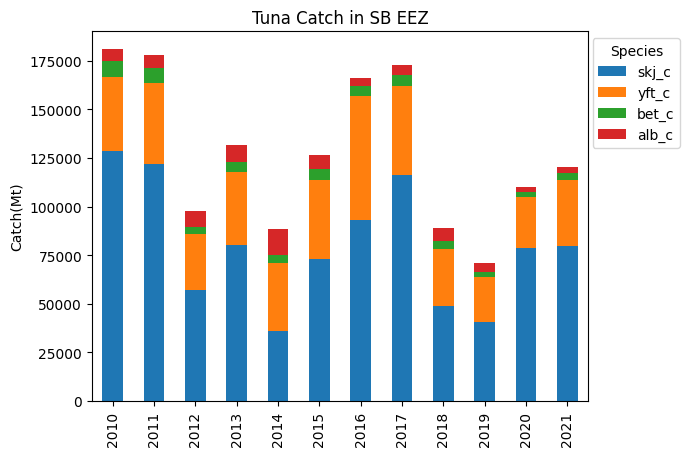

In [ ]:
# Plot stacked graph with header labels
SB_bar = SB.plot(kind='bar', stacked=True)
plt.xlabel('') # Use single quotation marks if you want to remove the x-axis legend labels
plt.ylabel('Catch(Mt)')
plt.title('Tuna Catch in SB EEZ')# Set the title
plt.legend(loc='upper right',title='Species', bbox_to_anchor=(1.2, 1))# Add a legend and move the legend outside the bar graph
plt.show()# Show the plot